# Use Vortex to check the sizes of the VarBC files over a given period

In [1]:
# Vortex initialisation...
%load_ext ivortex
%vortex

Vortex 1.4.0 loaded ( Thursday 09. August 2018, at 16:40:34 )


In [2]:
# matplotlib initialisation (for inline plotting)
%pylab --no-import-all
%matplotlib inline
import matplotlib.dates as mdates  # used later on

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


### Define a method that use the ResourceHandler's ``check`` method to return a time serie of the VarBC file size

In [3]:
def find_sizes(dstart, dend, dstep, **kwargs):
    """Find out the file sizes."""
    vbcdates = date.daterangex(dstart, dend, dstep)
    vbcsizes = np.ma.empty((len(vbcdates),), dtype=np.int64)

    with sh.ftppool():
        for i, idate in enumerate(vbcdates):
            thevarbc = toolbox.rh(date=idate, incore=True, **kwargs)
            checkedsize = thevarbc.check()
            vbcsizes[i] = checkedsize if checkedsize is not None else np.ma.masked

    print('{:d} files looked for... {:d} were not found.'.format(len(vbcdates),
                                                                 np.ma.count_masked(vbcsizes)))
    return vbcdates, vbcsizes

### Define a method that plots the timeseries

In [4]:
def plot_sizes(vbcdates, vbcsizes):
    """Plot the file size time serie."""

    vbcsizes_mb = vbcsizes / 1024. /1024.
    fig, ax = plt.subplots()
    ax.plot(mdates.date2num(vbcdates), vbcsizes_mb)

    # format the Xticks for dates
    months = mdates.MonthLocator()
    monthsFmt = mdates.DateFormatter('%Y-%m')
    wdays = mdates.WeekdayLocator(byweekday=mdates.MO)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(wdays)
    ax.grid(True)
        
    # Label...
    ax.set_ylabel('VarBC file size (Mb)')
    
    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

### Retrieve VarBC file size for Arpege 4Dvar (e-suite)

In [5]:
vbcdates_arp, vbcsizes_arp = find_sizes('2017013100', '2017120100', 'PT24H',
                                        kind='varbc', model='arpege', cutoff='assim',
                                        vapp='arpege', vconf='4dvarfr',
                                        namespace='[suite].archive.fr', suite='dble')

305 files looked for... 0 were not found.


### Retrieve VarBC file size for Arome 3Dvar (e-suite)

In [6]:
vbcdates_aro, vbcsizes_aro = find_sizes('2017013100', '2017120100', 'PT24H',
                                        kind='varbc', model='arome', cutoff='assim',
                                        vapp='arome', vconf='3dvarfr',
                                        namespace='[suite].archive.fr', suite='dble')

305 files looked for... 3 were not found.


### Plot VarBC file size for Arpege 4Dvar (e-suite)

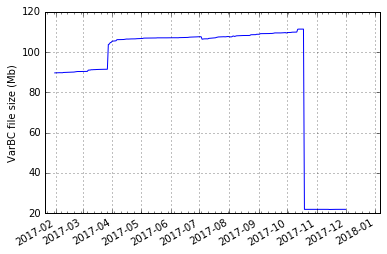

In [7]:
plot_sizes(vbcdates_arp, vbcsizes_arp)

### Plot VarBC file size for Arome 3Dvar (e-suite)

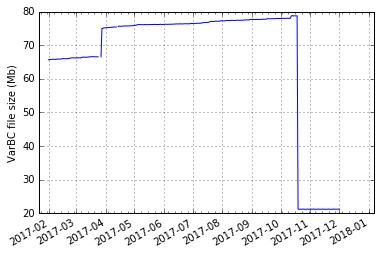

In [8]:
plot_sizes(vbcdates_aro, vbcsizes_aro)